# LAB 3A : Implement Simple Linear regression

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [3]:
dataset = pd.read_csv(r"C:\Users\Admin\Downloads\FitnessStudy.csv")

## EDA Steps

In [4]:
dataset.head()

,HoursTrained,FitnessScore
0,4.06,70.74
1,9.53,96.15
2,7.45,87.71
3,6.19,71.01
4,1.98,58.80


In [5]:
dataset.shape

(100, 2)

In [6]:
dataset.columns

Index(['HoursTrained', 'FitnessScore'], dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HoursTrained  100 non-null    float64
 1   FitnessScore  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
dataset.describe()

,HoursTrained,FitnessScore
count,100.000000,100.000000
mean,4.967000,74.829900
std,2.826157,14.184267
min,0.550000,50.050000
25%,2.335000,62.362500
50%,4.910000,72.595000
75%,7.435000,87.367500
max,9.880000,103.310000


## Preprocessing Steps

In [9]:
# Step 1 : Seprate i/p Independent Var and 
# o/p Dependent Var
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [10]:
print(X.head())

   HoursTrained
0          4.06
1          9.53
2          7.45
3          6.19
4          1.98


In [11]:
print(y.head())

0    70.74
1    96.15
2    87.71
3    71.01
4    58.80
Name: FitnessScore, dtype: float64


In [12]:
# Step 4 : Split data into training and testin
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split (X,y,
                                        test_size = 0.3,
                                        random_state = 0)

In [13]:
print(X_train.shape)
print(X_test.shape)

(70, 1)
(30, 1)


## Create the Regression model on training data

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [15]:
print("Intercept B0 = ",regressor.intercept_)
print("Coefficient B1= ",regressor.coef_)

Intercept B0 =  51.630819715048766
Coefficient B1=  [4.71449973]


From Above values our model regression line equation

**y = 26777.391341197632 + 9360.26128619 * X**


In [18]:
ynew = 26777.391341197632 + 9360.26128619 * 6

print(" 6 yr experience = ",ynew)

 6 yr experience =  82938.95905833764


In [19]:
ypred = regressor.predict(X_test)

In [20]:
print(ypred)
print(y_test)

[62.94561908 86.65955274 86.75384273 95.28708725 86.65955274 79.11635316
 67.61297381 90.52544252 80.76642807 76.09907333 94.06131732 88.07390266
 70.06451367 63.51135904 92.78840239 81.19073304 67.09437884 74.40185343
 96.46571218 80.90786306 94.72134728 91.09118249 80.81357307 62.89847408
 83.64227291 78.4563232  56.58104444 58.79685931 68.79159875 88.54535263]
26    60.29
86    92.94
2     87.71
55    96.64
75    88.88
93    75.38
16    63.44
73    92.73
54    73.15
95    71.87
53    92.48
92    87.42
78    71.02
13    65.17
7     91.06
30    90.78
22    66.43
24    67.07
33    97.18
8     77.01
43    99.46
62    95.92
3     71.01
71    55.35
45    79.40
48    81.38
6     62.64
99    61.74
82    62.24
76    85.75
Name: FitnessScore, dtype: float64


#### Accuracy of model

In [21]:
# 1. Training Accuracy

print("Training accuracy =",
      regressor.score(X_train,y_train))

Training accuracy = 0.902881752946386


In [22]:
# 2. Testing Accuracy

print("Testing accuracy =",
      regressor.score(X_test,y_test))

Testing accuracy = 0.8734375445402776


### Visualizing the Model

#### 1. Visualize the training data

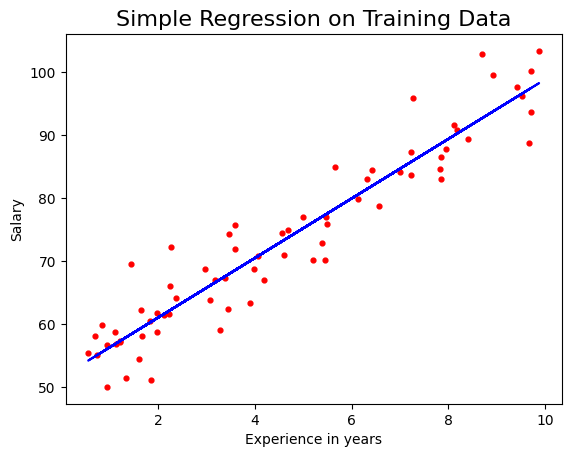

In [23]:
plt.scatter(X_train,y_train,color = 'red', s= 12)
plt.plot(X_train, regressor.predict(X_train),
        color = 'blue')
plt.title("Simple Regression on Training Data", size= 16)
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.show()

#### 2. Visualize the testing data

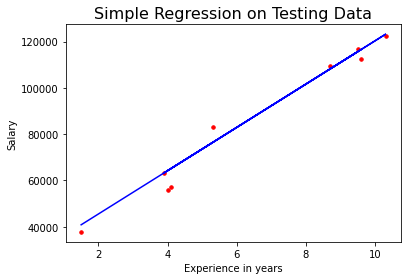

In [21]:
plt.scatter(X_test,y_test,color = 'red', s= 12)
plt.plot(X_test, regressor.predict(X_test),
        color = 'blue')
plt.title("Simple Regression on Testing Data", size= 16)
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.show()

#### Find R^2 Score of model

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.9740993407213511

In [26]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_train, regressor.predict(X_train))

5037.753526827437

median_absolute_error(y_test, regressor.predict(X_test))